# 1. Evaluacion modelos de clasificacion multiclase algoritmos de Machine Learning
***


### Caso de estudio #2


### Tecnicas de ajuste de los datos y modelos:

| Ingeniería de datos       | Si / No       |
| :-------                  | :------:    |
| Escalado de datos         | Si          |
| Ajuste de hiperparametros | No         |
| Sobremuestreo             | No          |
| Ajuste de pesos de clase  | No          |



In [1]:
# librerias
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns

from numpy.random import seed
seed(0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from plot_metric.functions import BinaryClassification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

In [2]:
# MULTICLASE funcion para generar matriz de confusion y medidas de desempeño del modelos clasificacion multiclase
def model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelo, label_pred):
    print('\n')
    print("MATRIZ DE CONFUSION")
    print('\n')
    matriz = confusion_matrix(label_test2, label_pred)
    #print(matriz)
    classes = ["Funcional","Falla comp1","Falla comp2","Falla comp3","Falla comp4"]
    cm = ConfusionMatrix(modelo, classes=classes, label_encoder={0:"Funcional", 1:"Falla comp1", 2:"Falla comp2", 3:"Falla comp3", 4:"Falla comp4"})
    cm.fit(data_train, label_train2)
    cm.score(data_test, label_test2)
    cm.show()
    # Medidas de desempeño del modelo
    print('\n')
    print("MEDIDAS DE DESEMPEÑO DEL MODELO")
    print('\n')
    print('Exactitud - Accuracy: {}'.format(modelo.score(data_test, label_test2)))
    print('-'*60)
    print('Precisión por clase: {}'.format(metrics.precision_score(label_test2, label_pred, average=None)))
    print('Sensibilidad - Recall por clase: {}'.format(metrics.recall_score(label_test2, label_pred, average=None)))
    print('F1 por clase: {}'.format(metrics.f1_score(label_test2, label_pred, average=None)))
    print('-'*60)
    print('F1 Macro: {}'.format(metrics.f1_score(label_test2, label_pred, average='macro')))
    print('F1 Micro: {}'.format(metrics.f1_score(label_test2, label_pred, average='micro')))
    print('F1 Weighted: {}'.format(metrics.f1_score(label_test2, label_pred, average='weighted')))
    print('-'*60)
    print('Sensibilidad - Recall Macro: {}'.format(metrics.recall_score(label_test2, label_pred, average='macro')))
    print('Sensibilidad - Recall Micro: {}'.format(metrics.recall_score(label_test2, label_pred, average='micro')))
    print('Sensibilidad - Recall Weighted: {}'.format(metrics.recall_score(label_test2, label_pred, average='weighted')))
    print('-'*60)
    print('Precisión Macro: {}'.format(metrics.precision_score(label_test2, label_pred, average='macro')))
    print('Precisión Micro: {}'.format(metrics.precision_score(label_test2, label_pred, average='micro')))
    print('Precisión Weighted: {}'.format(metrics.precision_score(label_test2, label_pred, average='weighted')))
        
    print('-'*60)
   
    print(classification_report(label_test2, label_pred))
    

In [3]:
# cargar archivos
test = pd.read_excel (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\datos simulacion\test11.xlsx')
train = pd.read_excel (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\datos simulacion\train11.xlsx')

In [4]:
train.head()

,datetime,id,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,mto_comp1,mto_comp2,mto_comp3,mto_comp4,model,age,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,0,0,0,0,0,0,0,0,0,3,18,0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,0,0,0,0,0,0,0,0,0,3,18,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,0,0,0,0,0,0,0,0,0,3,18,0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,0,0,0,0,0,0,0,0,0,3,18,0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,0,0,0,0,0,0,0,0,0,3,18,0


In [5]:
test.head()

,datetime,id,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,mto_comp1,mto_comp2,mto_comp3,mto_comp4,model,age,failure
0,2015-01-01 06:00:00,3,185.482043,461.211137,87.453199,28.216864,0,0,0,0,0,0,0,0,0,3,8,0
1,2015-01-01 07:00:00,3,179.818516,519.166185,109.318603,37.290722,0,0,0,0,0,0,0,0,0,3,8,0
2,2015-01-01 08:00:00,3,165.616803,467.107482,101.285580,34.530035,0,0,0,0,0,0,0,0,0,3,8,0
3,2015-01-01 09:00:00,3,165.007013,391.994872,98.825669,27.495507,0,0,0,0,0,0,0,0,0,3,8,0
4,2015-01-01 10:00:00,3,138.898164,488.764118,102.800017,44.698218,0,0,0,0,0,0,0,0,0,3,8,0


In [6]:
# tamaño base de entrenamiento y pruebas
print("numero de dimensiones train =", train.ndim)
print("tamaño de la tabla train=", train.shape)
print("total datos train =", train.size)
print("numero de dimensiones test =", test.ndim)
print("tamaño de la tabla test=", test.shape)
print("total datos test=", test.size)

numero de dimensiones train = 2
tamaño de la tabla train= (683388, 18)
total datos train = 12300984
numero de dimensiones test = 2
tamaño de la tabla test= (192752, 18)
total datos test= 3469536


In [7]:
variables=['volt','rotate','pressure','vibration','error1','error2','error3','error4','error5','mto_comp1','mto_comp2','mto_comp3','mto_comp4','model','age']

objetivo='failure'

In [8]:
# estandarizado de datos sin incluir id
scaler = StandardScaler()
train[variables]=scaler.fit_transform(train[variables])
test[variables]=scaler.transform(test[variables])
train.head()


,datetime,id,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,mto_comp1,mto_comp2,mto_comp3,mto_comp4,model,age,failure
0,2015-01-01 06:00:00,1,0.350986,-0.534618,1.105902,0.879350,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669,0
1,2015-01-01 07:00:00,1,-0.508982,-0.834013,-0.488294,0.567226,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669,0
2,2015-01-01 08:00:00,1,0.013930,1.533590,-2.318235,-1.154994,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669,0
3,2015-01-01 09:00:00,1,-0.535828,-1.909450,0.759382,0.139832,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669,0
4,2015-01-01 10:00:00,1,-0.848698,-0.214013,0.998102,-2.682002,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669,0


In [9]:
# separar base de entrenamiento en data_train y label_train
data_train=train.iloc[:,np.r_[2:17]]
data_train.head()


,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,mto_comp1,mto_comp2,mto_comp3,mto_comp4,model,age
0,0.350986,-0.534618,1.105902,0.879350,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669
1,-0.508982,-0.834013,-0.488294,0.567226,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669
2,0.013930,1.533590,-2.318235,-1.154994,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669
3,-0.535828,-1.909450,0.759382,0.139832,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669
4,-0.848698,-0.214013,0.998102,-2.682002,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669


In [10]:
# etiquetas
label_train2=train.iloc[:,17]
label_train2.head()

0    0
1    0
2    0
3    0
4    0
Name: failure, dtype: int64

In [11]:
# separar base de prueba en data_test y label_test
data_test=test.iloc[:,np.r_[2:17]]
label_test2=test.iloc[:,17]
data_test.head()

,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,mto_comp1,mto_comp2,mto_comp3,mto_comp4,model,age
0,0.948268,0.276871,-1.212875,-2.266819,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,-0.541085
1,0.583128,1.378091,0.765720,-0.574673,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,-0.541085
2,-0.332485,0.388909,0.038814,-1.089502,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,-0.541085
3,-0.371799,-1.038326,-0.183783,-2.401342,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,-0.541085
4,-2.055090,0.800413,0.175855,0.806719,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,-0.541085


## Modelos de clasificacion multiclase

## Modelo Random Forest 

In [12]:
modelom1=RandomForestClassifier(random_state=0, n_estimators=10)
modelom1.fit(data_train, label_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [13]:
label_predm1 = modelom1.predict(data_test)

In [14]:
# para evaluar cuales caracteristicas tiene mayor peso en el modelo
fi=modelom1.feature_importances_
fi

array([1.08264662e-01, 1.31783924e-01, 1.25966143e-01, 1.28359537e-01,
       7.69999831e-05, 2.94445860e-05, 1.38388036e-04, 9.82490942e-06,
       1.35952910e-04, 9.11761097e-02, 1.39004270e-01, 6.11121909e-02,
       7.88386508e-02, 4.23719323e-02, 9.27319694e-02])



MATRIZ DE CONFUSION




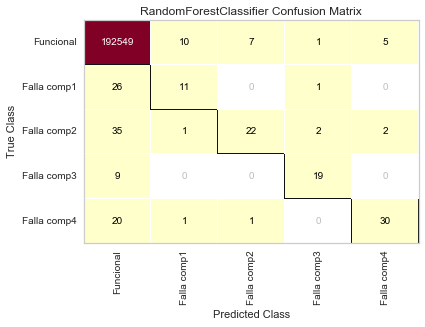



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9993722503527849
------------------------------------------------------------
Precisión por clase: [0.9995328  0.47826087 0.73333333 0.82608696 0.81081081]
Sensibilidad - Recall por clase: [0.99988056 0.28947368 0.35483871 0.67857143 0.57692308]
F1 por clase: [0.99970665 0.36065574 0.47826087 0.74509804 0.6741573 ]
------------------------------------------------------------
F1 Macro: 0.6515757208263595
F1 Micro: 0.9993722503527849
F1 Weighted: 0.999288131090214
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.579937492707016
Sensibilidad - Recall Micro: 0.9993722503527849
Sensibilidad - Recall Weighted: 0.9993722503527849
------------------------------------------------------------
Precisión Macro: 0.7696049550229694
Precisión Micro: 0.9993722503527849
Precisión Weighted: 0.9992683057956738
------------------------------------------------------------
              precision    recall

In [15]:
# metricas de desempeño
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelom1, label_predm1)

Se observa un numero significativo de falsos negativos lo que genera un bajo Recall macro

## Clasificador Gausiano Naive Bayes

In [16]:
modelom2 = GaussianNB()
modelom2.fit(data_train, label_train2);
label_predm2 = modelom2.predict(data_test)



MATRIZ DE CONFUSION




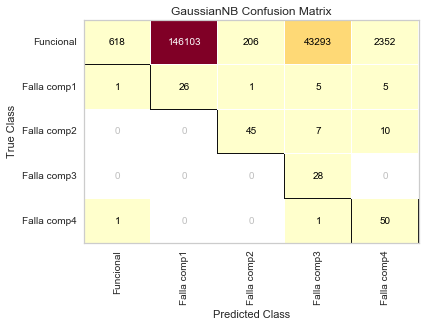



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.003979206441437702
------------------------------------------------------------
Precisión por clase: [9.96774194e-01 1.77924984e-04 1.78571429e-01 6.46143905e-04
 2.06868018e-02]
Sensibilidad - Recall por clase: [0.00320919 0.68421053 0.72580645 1.         0.96153846]
F1 por clase: [0.00639778 0.00035576 0.2866242  0.00129145 0.04050223]
------------------------------------------------------------
F1 Macro: 0.06703428453846634
F1 Micro: 0.003979206441437702
F1 Weighted: 0.006495184859682664
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.6749529257514788
Sensibilidad - Recall Micro: 0.003979206441437702
Sensibilidad - Recall Weighted: 0.003979206441437702
------------------------------------------------------------
Precisión Macro: 0.2393712985659644
Precisión Micro: 0.003979206441437702
Precisión Weighted: 0.9959065119710552
----------------------------------------------------------

In [17]:
# metricas de desempeño
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelom2, label_predm2)

## Clasificacion con Support Vector Machine

In [18]:
modelom3 = SVC(kernel='rbf', random_state=0)
modelom3.fit(data_train, label_train2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
label_predm3 = modelom3.predict(data_test)



MATRIZ DE CONFUSION




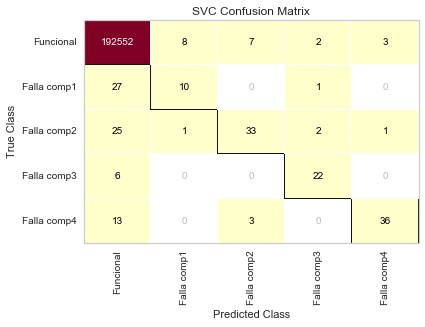



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9994863866522786
------------------------------------------------------------
Precisión por clase: [0.9996314  0.52631579 0.76744186 0.81481481 0.9       ]
Sensibilidad - Recall por clase: [0.99989614 0.26315789 0.53225806 0.78571429 0.69230769]
F1 por clase: [0.99976376 0.35087719 0.62857143 0.8        0.7826087 ]
------------------------------------------------------------
F1 Macro: 0.7123642146451473
F1 Micro: 0.9994863866522786
F1 Weighted: 0.9994288331031594
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.654666816003273
Sensibilidad - Recall Micro: 0.9994863866522786
Sensibilidad - Recall Weighted: 0.9994863866522786
------------------------------------------------------------
Precisión Macro: 0.8016407738206089
Precisión Micro: 0.9994863866522786
Precisión Weighted: 0.9994096819153202
------------------------------------------------------------
              precision    recal

In [20]:
# metricas de desempeño
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelom3, label_predm3)

## Decision tree 

In [12]:
modelom5 = tree.DecisionTreeClassifier()
modelom5.fit(data_train, label_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
label_predm5 = modelom5.predict(data_test)



MATRIZ DE CONFUSION




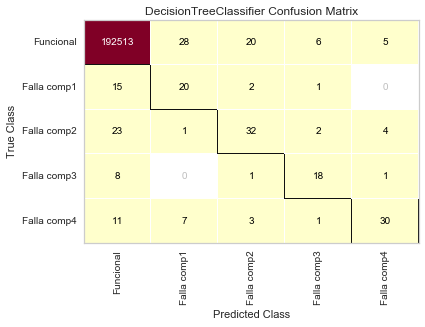



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9992788661077446
------------------------------------------------------------
Precisión por clase: [0.999704   0.35714286 0.55172414 0.64285714 0.75      ]
Sensibilidad - Recall por clase: [0.99969362 0.52631579 0.51612903 0.64285714 0.57692308]
F1 por clase: [0.99969881 0.42553191 0.53333333 0.64285714 0.65217391]
------------------------------------------------------------
F1 Macro: 0.6507190233027306
F1 Micro: 0.9992788661077446
F1 Weighted: 0.9992900183745086
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.6523837325198292
Sensibilidad - Recall Micro: 0.9992788661077446
Sensibilidad - Recall Weighted: 0.9992788661077446
------------------------------------------------------------
Precisión Macro: 0.6602856283339869
Precisión Micro: 0.9992788661077446
Precisión Weighted: 0.999314029079494
------------------------------------------------------------
              precision    recal

In [14]:
# metricas de desempeño
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelom5, label_predm5)

## Logistic Regression

In [15]:
modelom6 = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=200)
modelom6.fit(data_train, label_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
label_predm6 = modelom6.predict(data_test)



MATRIZ DE CONFUSION




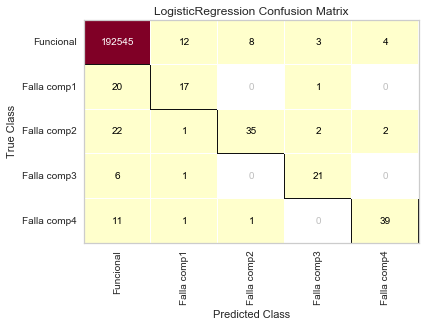



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9995071387067319
------------------------------------------------------------
Precisión por clase: [0.99969367 0.53125    0.79545455 0.77777778 0.86666667]
Sensibilidad - Recall por clase: [0.99985979 0.44736842 0.56451613 0.75       0.75      ]
F1 por clase: [0.99977673 0.48571429 0.66037736 0.76363636 0.80412371]
------------------------------------------------------------
F1 Macro: 0.7427256889252826
F1 Micro: 0.9995071387067319
F1 Weighted: 0.9994791253146424
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.7023488685571604
Sensibilidad - Recall Micro: 0.9995071387067319
Sensibilidad - Recall Weighted: 0.9995071387067319
------------------------------------------------------------
Precisión Macro: 0.7941685323778375
Precisión Micro: 0.9995071387067319
Precisión Weighted: 0.9994675019131265
------------------------------------------------------------
              precision    reca

In [17]:
# metricas de desempeño
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelom6, label_predm6)

## Bagging Classifier

In [18]:
modelom7= BaggingClassifier()
modelom7.fit(data_train, label_train2)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)



MATRIZ DE CONFUSION




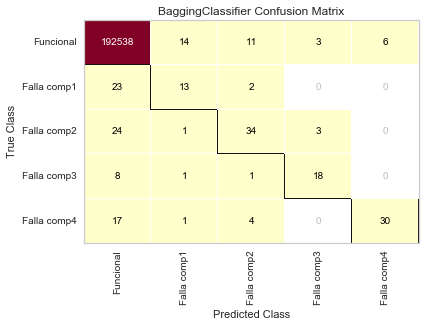



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9993826263800116
------------------------------------------------------------
Precisión por clase: [0.99962619 0.43333333 0.65384615 0.75       0.83333333]
Sensibilidad - Recall por clase: [0.99982344 0.34210526 0.5483871  0.64285714 0.57692308]
F1 por clase: [0.99972481 0.38235294 0.59649123 0.69230769 0.68181818]
------------------------------------------------------------
F1 Macro: 0.6705389697578361
F1 Micro: 0.9993826263800116
F1 Weighted: 0.9993429705395603
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.6220192044745432
Sensibilidad - Recall Micro: 0.9993826263800116
Sensibilidad - Recall Weighted: 0.9993826263800116
------------------------------------------------------------
Precisión Macro: 0.7340278016291724
Precisión Micro: 0.9993826263800116
Precisión Weighted: 0.9993221998547793
------------------------------------------------------------
              precision    reca

In [20]:
label_predm7 = modelom7.predict(data_test)
# metricas de desempeño
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelom7, label_predm7)

## Extra Trees Classifier

In [21]:
modelom9=ExtraTreesClassifier(n_estimators=100)
modelom9.fit(data_train, label_train2)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)



MATRIZ DE CONFUSION




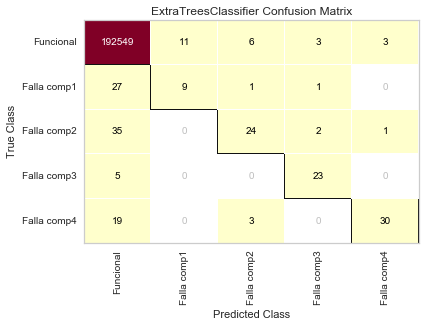



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9993930024072383
------------------------------------------------------------
Precisión por clase: [0.99955356 0.45       0.70588235 0.79310345 0.88235294]
Sensibilidad - Recall por clase: [0.99988056 0.23684211 0.38709677 0.82142857 0.57692308]
F1 por clase: [0.99971704 0.31034483 0.5        0.80701754 0.69767442]
------------------------------------------------------------
F1 Macro: 0.6629507650613752
F1 Micro: 0.9993930024072383
F1 Weighted: 0.9993109154656409
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.6044342183921966
Sensibilidad - Recall Micro: 0.9993930024072383
Sensibilidad - Recall Weighted: 0.9993930024072383
------------------------------------------------------------
Precisión Macro: 0.7661784604469319
Precisión Micro: 0.9993930024072383
Precisión Weighted: 0.9992891491715014
------------------------------------------------------------
              precision    reca

In [22]:
label_predm9 = modelom9.predict(data_test)
# metricas de desempeño:
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelom9, label_predm9)

## Gradient Boosting Classifier

In [23]:
modelom10=GradientBoostingClassifier(n_estimators=100)
modelom10.fit(data_train, label_train2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)



MATRIZ DE CONFUSION




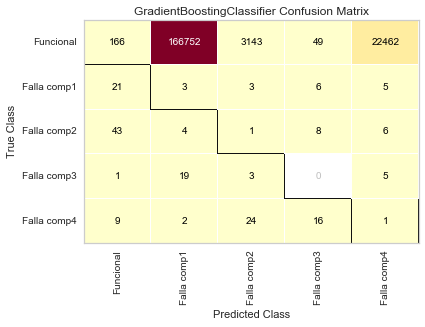



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.0008871503278824604
------------------------------------------------------------
Precisión por clase: [6.91666667e-01 1.79877683e-05 3.15059861e-04 0.00000000e+00
 4.44859647e-05]
Sensibilidad - Recall por clase: [0.00086202 0.07894737 0.01612903 0.         0.01923077]
F1 por clase: [1.72188453e-03 3.59673417e-05 6.18046972e-04 0.00000000e+00
 8.87665883e-05]
------------------------------------------------------------
F1 Macro: 0.0004929330862976607
F1 Micro: 0.0008871503278824604
F1 Weighted: 0.0017205063981001881
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.023033837031226388
Sensibilidad - Recall Micro: 0.0008871503278824604
Sensibilidad - Recall Weighted: 0.0008871503278824604
------------------------------------------------------------
Precisión Macro: 0.1384088400522072
Precisión Micro: 0.0008871503278824604
Precisión Weighted: 0.6910208758604327
---------------------------

In [25]:
label_predm10 = modelom10.predict(data_test)
# model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelom10, label_predm10)